<a href="https://colab.research.google.com/github/omaskii/Portfolio_Projects_Python/blob/main/Linear_Regression_MachineLearningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solomon Akatakpo (PhD..)

In this exercise, I will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

##Step 1 - Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


##Step 2 - Load data but first connect google colab

In [2]:
#Mount drive to connect data folder in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load Data

In [3]:
auto_data = pd.read_csv('/content/drive/MyDrive/Data_Science/LinearRegression/auto_mpg.csv')

##Step 3  - Review Data

In [4]:
auto_data.shape

(398, 9)

The data has 398 rows and 9 columns

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


8 variables: 

MPG (miles per gallon), 

cylinders,

engine displacement (cu. inches), 

horsepower,

vehicle weight (lbs.),

time to accelerate from O to 60 mph (sec.),


model year (modulo 100), and 

origin of car (1. American, 2. European,3. Japanese).
#
Also provided are the car labels (types) 

Missing data values are marked by series of question marks.

In [6]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
#dropping/ignoring car_name 
auto_data = auto_data.drop('car name', axis=1)
# Also replacing the categorical var with actual values
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


##Step 4 Create Dummy Variables

Substituting values like 'America' with numbers in an equation would be inaccurate. This method would imply that European cars are precisely halfway between American and Asian cars, which is an unfounded assumption. 

To avoid this, we can use three columns with simple true or false statements titled "Is this car American?", "Is this car European?", and "Is this car Asian?" These columns will serve as independent variables, without imposing any ordering among the three regions.

In [8]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


##Step 5 - Dealing with missing values

In [9]:
#A quick summary of the data columns
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [10]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
auto_data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [11]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(auto_data.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
auto_data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [12]:
# Missing values have a'?''
# Replace missing values with NaN
auto_data = auto_data.replace('?', np.nan)
auto_data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


Dealing with missing values can be approached in different ways, such as dropping the affected rows or replacing the missing values with median values. In the dataset, there are 398 rows and 6 of them have NaN values in the 'hp' column. While dropping those 6 rows is an option, it may not always be the best solution.

In [13]:
#instead of dropping the rows, lets replace the missing values with median value. 
auto_data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [14]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
auto_data = auto_data.apply(medianFiller,axis=0)

auto_data['horsepower'] = auto_data['horsepower'].astype('float64')  # converting the hp column from object / string type to float


##Step 6 - Bivariate Analysis

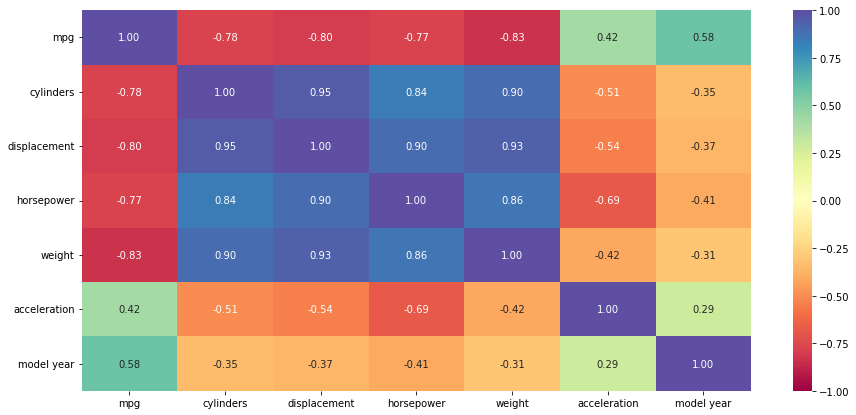

In [16]:
# Check for correlation among numerical variables
var_num = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year']

corr = auto_data[var_num].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

strong negative correlation between mpg and cylinders, displacement, horsepower, and weight

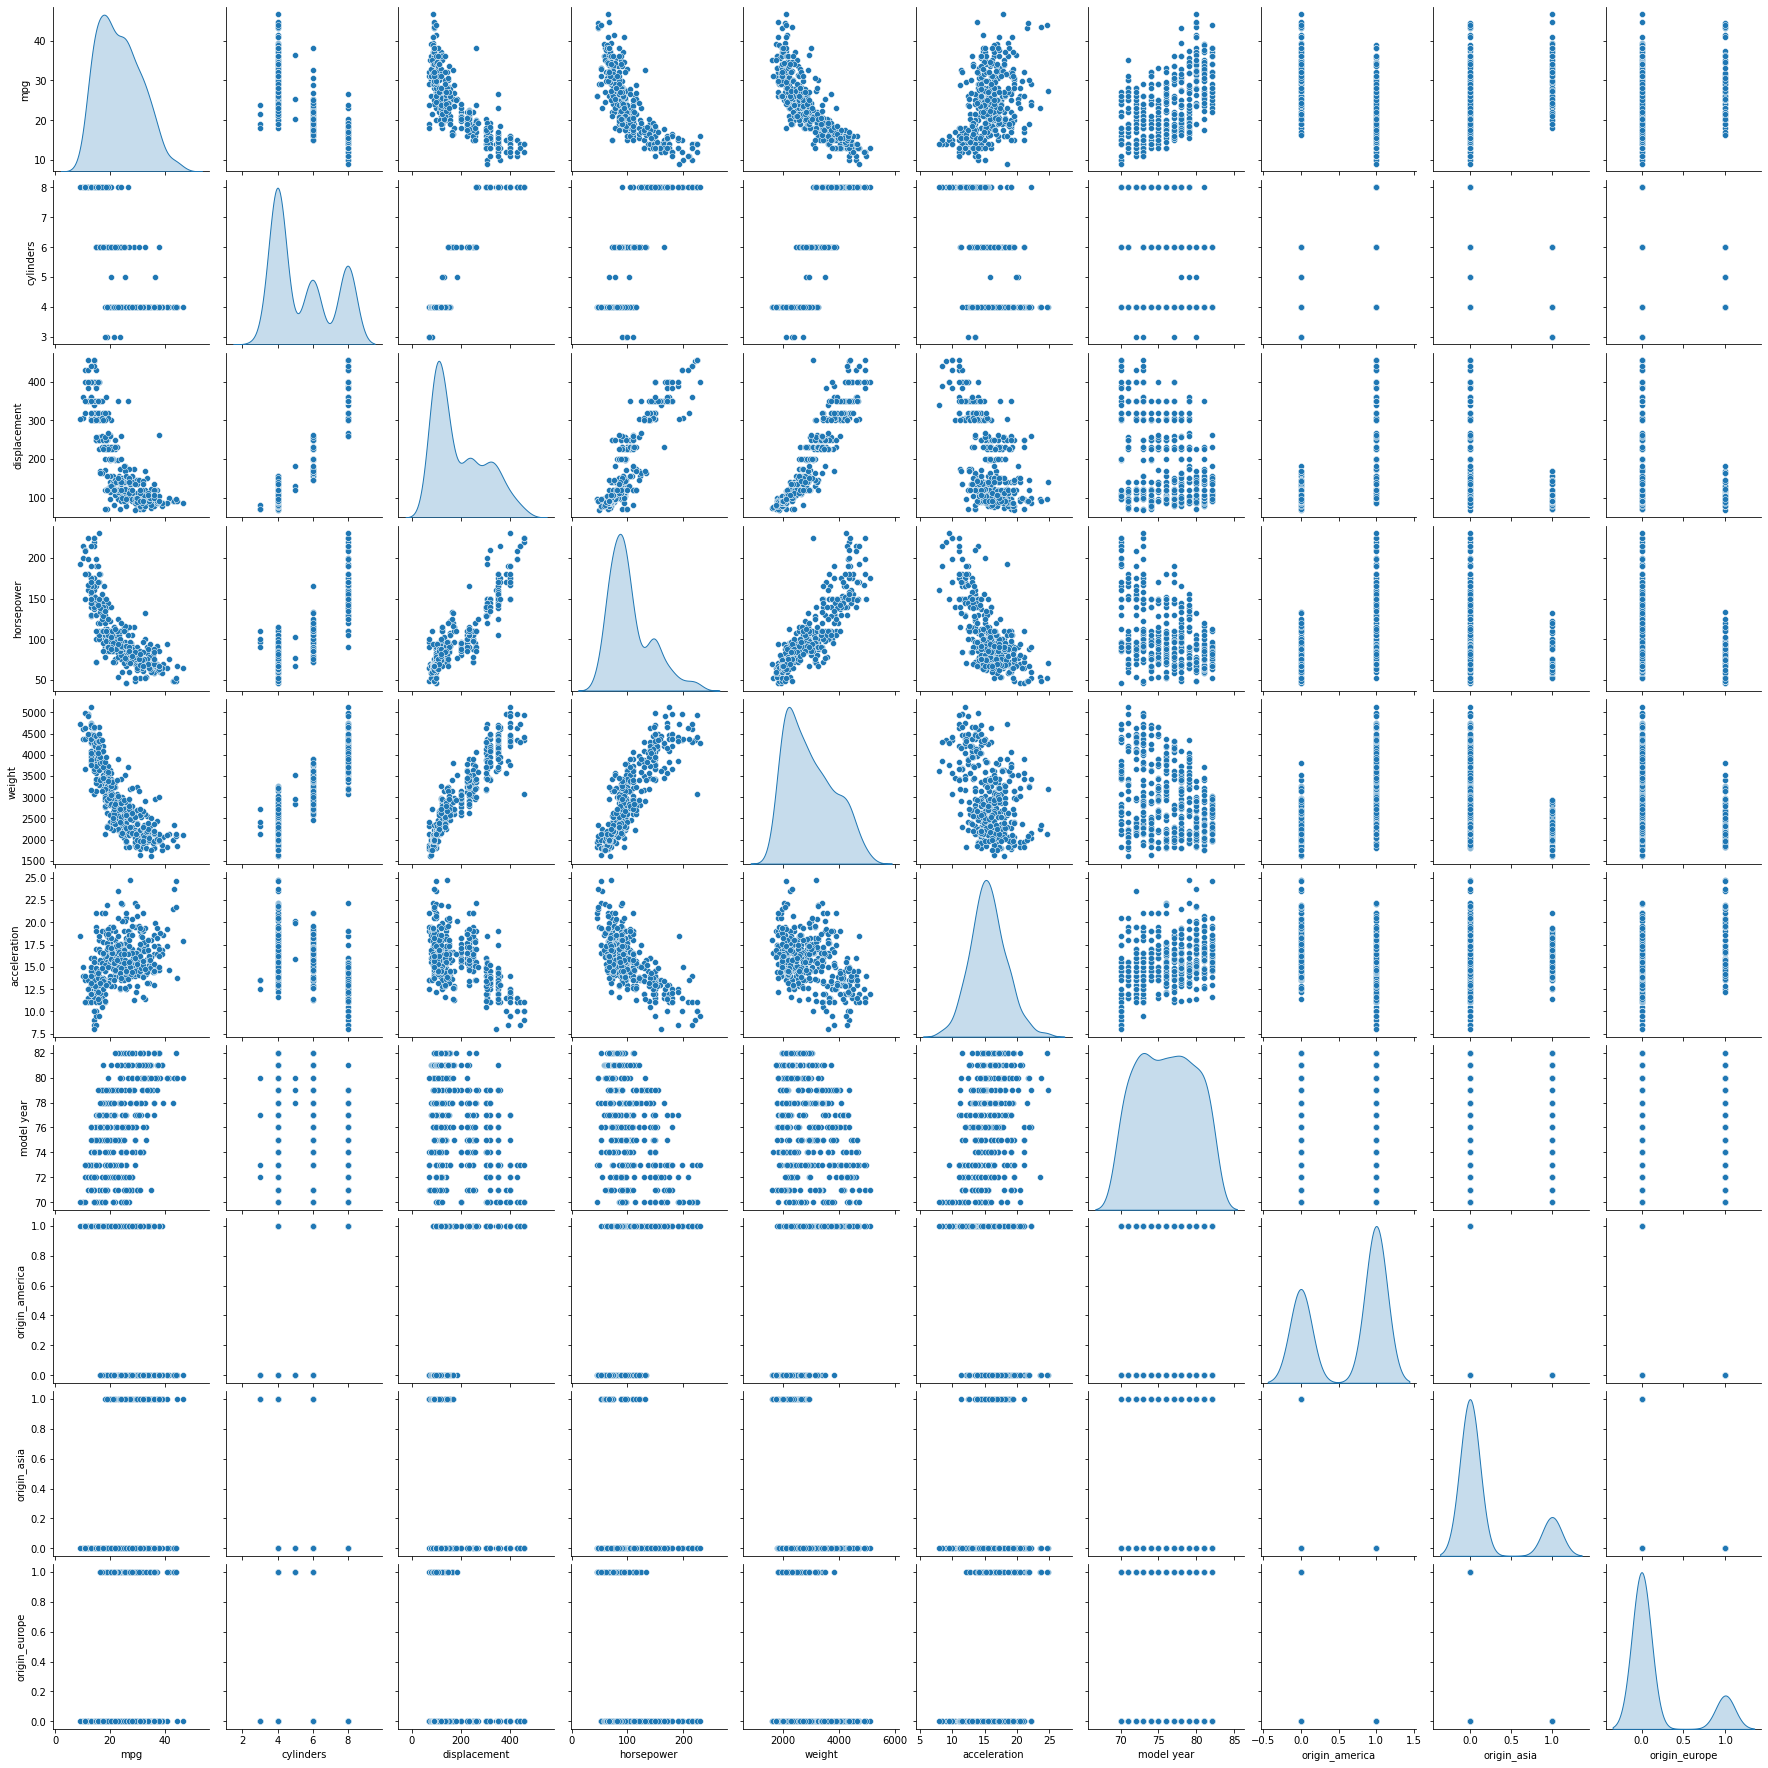

In [17]:
auto_data_attr = auto_data.iloc[:, 0:7]
sns.pairplot(auto_data, diag_kind='kde')   # to plot density curve instead of histogram on the diag

The observations between 'mpg' and other attributes suggest that their relationship is not strictly linear. Nevertheless, the plots reveal that linearity could still capture a significant amount of valuable information or patterns. It appears that several assumptions of classical linear regression, such as the assumption of no heteroscedasticity, are not met.

##Step 7 - Split Data

In [19]:
# lets build our linear model
# independant variables
X = auto_data.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = auto_data[['mpg']]

In [20]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

##Step 8 - Fit Linear Model



In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Here the coefficient for each variable

In [22]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482383
The coefficient for displacement is 0.02894551076548718
The coefficient for horsepower is -0.021752207723546777
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.061919366007618756
The coefficient for model year is 0.836933891764499
The coefficient for origin_america is -3.001283000918514
The coefficient for origin_asia is -0.6060179643247368


In [23]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372046


The score (R^2) for in-sample and out of sample

In [24]:
regression_model.score(X_train, y_train)

0.8141025501610559

In [25]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8433135132808833

##Adding Interaction Terms


In [26]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9015975294156652


In [27]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8647441059707272


In [28]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


By using Polynomial Features that only include interaction terms, the out-of-sample R^2 has improved. However, this improvement comes at the cost of significantly increasing the number of variables